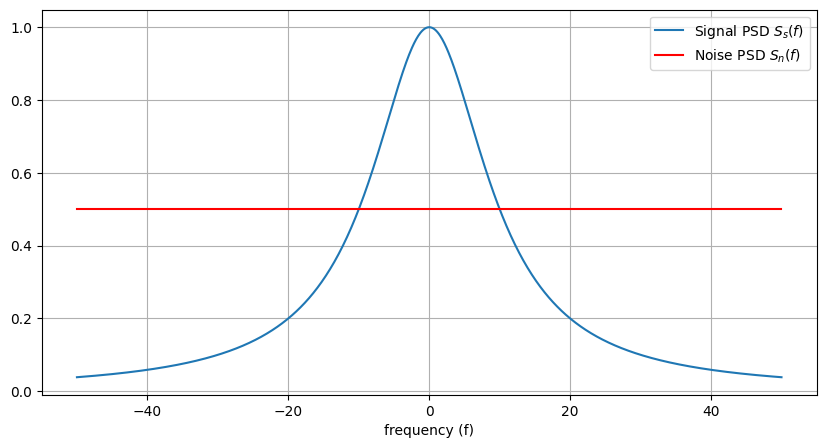

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

P0 = 1
B = 10
N0 = 1

f = np.linspace(-5*B, 5*B, 1000)

S_s = P0 / (1 + (f / B)**2)
S_n = np.ones(len(f))*(N0/2)


plt.figure(figsize=(10, 5))
plt.plot(f, S_s, label='Signal PSD $S_s(f)$')
plt.plot(f, S_n, label='Noise PSD $S_n(f)$', color='red')
plt.xlabel('frequency (f)')
plt.legend()
plt.grid(True)
plt.show()

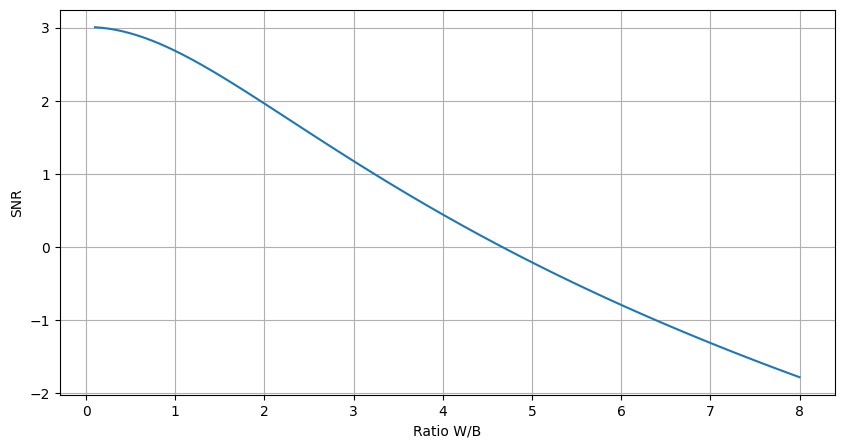

In [32]:
W_array = np.linspace(1, 80, 100)

def signal_power(W, B=B):
    signal_psd = lambda f: P0 / (1 + (f / B)**2)
    return quad(signal_psd, -W/2, W/2)[0]

signal_power_values = np.array([signal_power(W) for W in W_array])

noise_power_values = (N0/2) * W_array

SNR_func = signal_power_values / noise_power_values

plt.figure(figsize=(10, 5))
plt.plot(W_array / B, np.log10(SNR_func)*10)
plt.xlabel('Ratio W/B')
plt.ylabel('SNR')
plt.grid(True)
plt.show()

##**A SNR aumenta à medida que a largura de banda do filtro (W) aproxima-se de zero**